<h1  align=center><font  size = 6>Classify High Energy Gamma Particles Observed From MAGIC Telescope</font></h1>

<p align="center">
    <img src="https://www.iac.es/sites/default/files/styles/crop_cinemascope_48_17_to_1920px/public/images/installation/Perfil%20ORM%20V%C3%ADa%20Lactea.jpg?h=ef71438a&itok=VvicsMzE" height=370  width=1000> 
</p>

<small>Picture Source: <a href="https://www.iac.es/en/observatorios-de-canarias/telescopes-and-experiments/magic-telescopes">Instituto de Astrofísica de Canarias</a></small>

<br>

<h2>Data Set Information</h2>

<p>The data are <i>MC generated</i> (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the <i>electromagnetic showers</i> initiated by the <i>gammas</i>, and <i>developing</i> in the <i>atmosphere</i>. This <i>Cherenkov radiation (of visible to UV wavelengths)</i> leaks through the <i>atmosphere</i> and gets recorded in the detector, allowing reconstruction of the <i>shower parameters</i>. The available information consists of pulses left by the incoming <i>Cherenkov photons</i> on the <i>photomultiplier tubes</i>, arranged in a plane, the camera. Depending on the energy of the primary <i>gamma</i>, a total of few hundreds to some <i>10000 Cherenkov photons</i> get collected, in <i>patterns (called the shower image)</i>, allowing to discriminate statistically those caused by primary <i>gammas (signal)</i> from the images of hadronic showers initiated by cosmic rays in the <i>upper atmosphere (background)</i>.</p>

<p>Typically, the image of a shower after some <i>pre-processing</i> is an <i>elongated cluster</i>. Its long axis is oriented towards the camera center if the <i>shower axis</i> is parallel to the telescope's <i>optical axis</i>, i.e. if the telescope axis is directed towards a point source. A <i>principal component analysis</i> is performed in the camera plane, which results in a correlation <i>axis</i> and defines an <i>ellipse</i>. If the <i>depositions</i> were distributed as a <i>bivariate Gaussian</i>, this would be an <i>equidensity ellipse</i>. The characteristic parameters of this <i>ellipse (often called Hillas parameters)</i> are among the image parameters that can be used for <i>discrimination</i>. <i>The energy depositions</i> are typically <i>asymmetric</i> along the <i>major axis</i>, and this <i>asymmetry</i> can also be used in <i>discrimination</i>. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions. This information has taken from <a href='https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope'>archive.ics.uci.edu</a> site.</p>

<br>

<h2>Keywords</h2>
<ul>
  <li>Neural Networks</li>
  <li>Space</li>
  <li>Telescope</li>
  <li>Classification</li>
  <li>High Energy Gamma Particles</li>
	<li>Deep Learning</li>
</ul>

<br>

<p>The data set was generated by a <i>Monte Carlo program, Corsika</i>, described in:
D. Heck et al., <i>CORSIKA</i>, A Monte Carlo code to <i>simulate extensive air showers</i>, <i><a href='http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68'>Forschungszentrum Karlsruhe FZKA 6019 (1998)</a></i>.

The program was run with parameters allowing to observe events with energies down to below <i>50 GeV</i>.</p>

<br>

<h2>Source</h2>

<h3>Original Owner:</h3>

<ul>
  <li>R. K. Bock</li>
  <li>Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)</li>
  <li>http://wwwmagic.mppmu.mpg.de</li>
  <li>rkb '@' mail.cern.ch</li>
</ul>

<h3>Donor</h3>

<ul>
  <li>P. Savicky</li>
  <li>Institute of Computer Science, AS of CR</li>
  <li>Czech Republic</li>
  <li>savicky '@' cs.cas.cz</li>
</ul>

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#import">Import Libraries</a></li>
<li><a href="https://#data_preparation">Dataset Preparation</a></li>
<li><a href="https://#compile_fit">Build and Fit the Model</a></li>
<li><a href="https://#analize_model">Analize the Model</a></li>
<li><a href="https://#revelant_papers">Relevant Papers</a></li>

<br>

<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<br>
<h2 align=center id="import">Import Libraries</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  get_ipython().run_line_magic('tensorflow_version', '2.x')
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

import keras

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

<br>
<h2 align=center id="data_preparation">Dataset Preparation (Data Preprocessing)</h2>

<p>Let's build some necessary functions for visualisation and pre-processing.</p>

In [ ]:
# Functions taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def format_output(data):
    y1 = data.pop('le_class')
    y1 = np.array(y1)
    return y1

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def plot_metrics(metric_name, title, ylim=5):
    plt.figure(figsize = (20, 10))
    sns.set_style('whitegrid')
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend(['train', 'validation'])
    plt.show()

In [ ]:
df = pd.read_csv('/content/magic04.data', sep=",", skiprows=1, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


<p>Now, we can upload our data named <code>magic04.data</code>. It doesn't have named columns. We need to spesify them after importing our data into <i>dataframe</i>. Let's take a look at attribute information from <a href='https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope'>archive.ics.uci.edu</a> site.</p>

<h3>Attribute Information</h3>

<ol>
  <li>fLength: continuous (major axis of ellipse as <i>mm</i>)</li>
  <li>fWidth: continuous (minor axis of ellipse as <i>mm</i>)</li>
  <li>fSize: continuous (10-log of sum of content of all pixels <i>in photo</i>)</li>
  <li>fConc: continuous (ratio of sum of two highest pixels over fSize as <i>ratio</i>)</li>
  <li>fConc1: continuous (ratio of highest pixel over fSize as <i>ratio</i>)</li>
  <li>fAsym: continuous (distance from highest pixel to center, projected onto major axis as <i>mm</i>)</li>
  <li>fM3Long: continuous (3rd root of third moment along major axis as <i>mm</i>) </li>
  <li>fM3Trans: continuous (3rd root of third moment along minor axis as <i>mm</i>)</li>
  <li>fAlpha: continuous (angle of major axis with vector to origin as <i>deg</i>)</li>
  <li>fDist: continuous (distance from origin to center of ellipse as <i>mm</i>)</li>
  <li>class: g,h (as gamma (<i>signal</i>) and hadron (<i>background</i>))</li>
</ol>

In [ ]:
df.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
print("Number of NaN values: {}.".format(df.isnull().sum().sum()))

Number of NaN values: 0.


In [ ]:
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 115.


<p>We have 115 duplicated rows. We need to drop them because we want the program to learn, not memorize.</p>

In [ ]:
dp = df[df.duplicated(keep=False)]
df.drop_duplicates(inplace= True)
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 0.


In [ ]:
le = LabelEncoder()
df["le_class"] = le.fit_transform(df['class'])

<p>In a real-world scenario, you should shuffle the data.</p>

In [ ]:
df = df.iloc[np.random.permutation(len(df))]

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,le_class
17339,20.0845,0.0000,2.6660,0.8846,0.4498,9.5794,-15.6732,0.0000,34.2250,138.577,h,1
9877,52.1899,14.2675,2.6201,0.3477,0.2098,47.3795,37.3314,-8.7793,3.1390,126.020,g,0
10747,61.8236,24.1130,3.0650,0.2695,0.1545,-47.9552,33.6217,3.8995,5.6814,278.240,g,0
13669,211.1910,74.2423,3.3876,0.1966,0.0993,-165.4550,-159.4830,-56.2093,77.0770,255.270,h,1
17709,68.3430,46.2474,3.3124,0.2923,0.1473,-15.1028,-44.7073,-25.5123,32.2020,450.953,h,1


In [ ]:
df.drop('class', axis=1, inplace=True)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,le_class
17339,20.0845,0.0000,2.6660,0.8846,0.4498,9.5794,-15.6732,0.0000,34.2250,138.577,1
9877,52.1899,14.2675,2.6201,0.3477,0.2098,47.3795,37.3314,-8.7793,3.1390,126.020,0
10747,61.8236,24.1130,3.0650,0.2695,0.1545,-47.9552,33.6217,3.8995,5.6814,278.240,0
13669,211.1910,74.2423,3.3876,0.1966,0.0993,-165.4550,-159.4830,-56.2093,77.0770,255.270,1
17709,68.3430,46.2474,3.3124,0.2923,0.1473,-15.1028,-44.7073,-25.5123,32.2020,450.953,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fLength,18904.0,53.162704,42.260535,4.2835,24.356500,37.13155,69.978650,334.1770
fWidth,18904.0,22.146197,18.301093,0.0000,11.874100,17.14525,24.712700,256.3820
fSize,18904.0,2.824653,0.472387,1.9413,2.477100,2.74000,3.101100,5.3233
fConc,18904.0,0.380247,0.182714,0.0131,0.235800,0.35395,0.503500,0.8930
fConc1,18904.0,0.214561,0.110386,0.0003,0.128500,0.19640,0.285025,0.6752
fAsym,18904.0,-4.179553,59.011164,-457.9161,-20.479425,4.05720,24.123900,575.2407
fM3Long,18904.0,10.618224,50.901966,-331.7800,-12.771025,15.33615,35.873725,238.3210
fM3Trans,18904.0,0.259812,20.775727,-205.8947,-10.836325,0.77435,10.949850,179.8510
fAlpha,18904.0,27.550981,26.083586,0.0000,5.516050,17.53240,45.707325,90.0000
fDist,18904.0,193.718469,74.683258,1.2826,142.277775,191.83255,240.413500,495.5610


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18904 entries, 17339 to 17171
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18904 non-null  float64
 1   fWidth    18904 non-null  float64
 2   fSize     18904 non-null  float64
 3   fConc     18904 non-null  float64
 4   fConc1    18904 non-null  float64
 5   fAsym     18904 non-null  float64
 6   fM3Long   18904 non-null  float64
 7   fM3Trans  18904 non-null  float64
 8   fAlpha    18904 non-null  float64
 9   fDist     18904 non-null  float64
 10  le_class  18904 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.7 MB


In [ ]:
df['le_class'].value_counts()

0    12331
1     6573
Name: le_class, dtype: int64

Text(0, 0.5, 'Frequency')

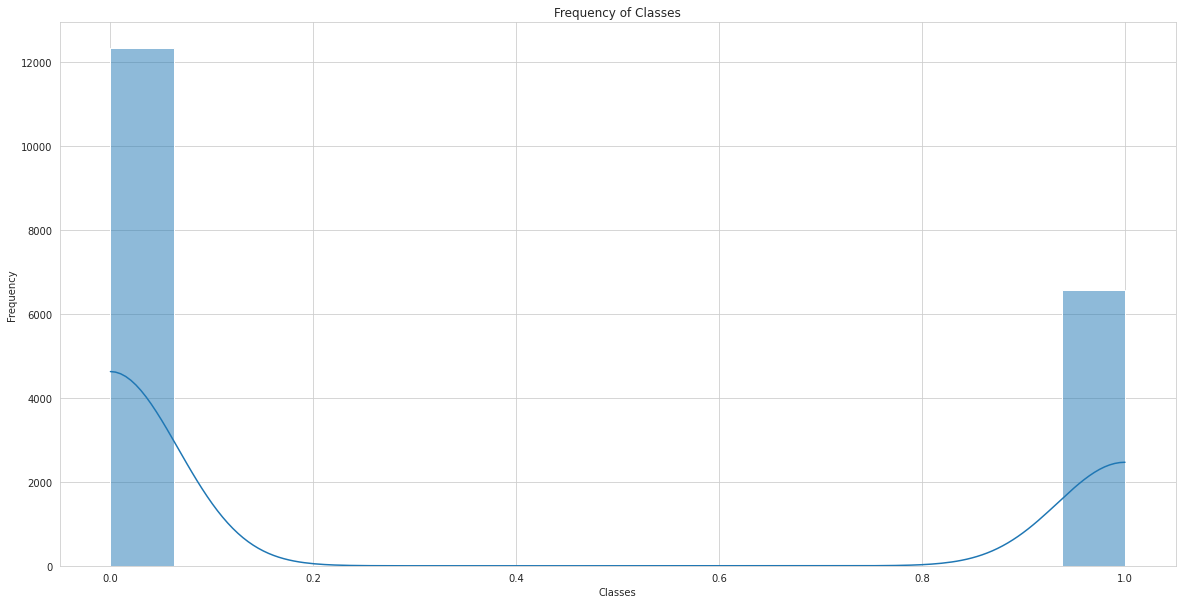

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('whitegrid')
sns.histplot(data=df['le_class'], kde=True)
plt.title("Frequency of Classes")
plt.xlabel("Classes")
plt.ylabel("Frequency")

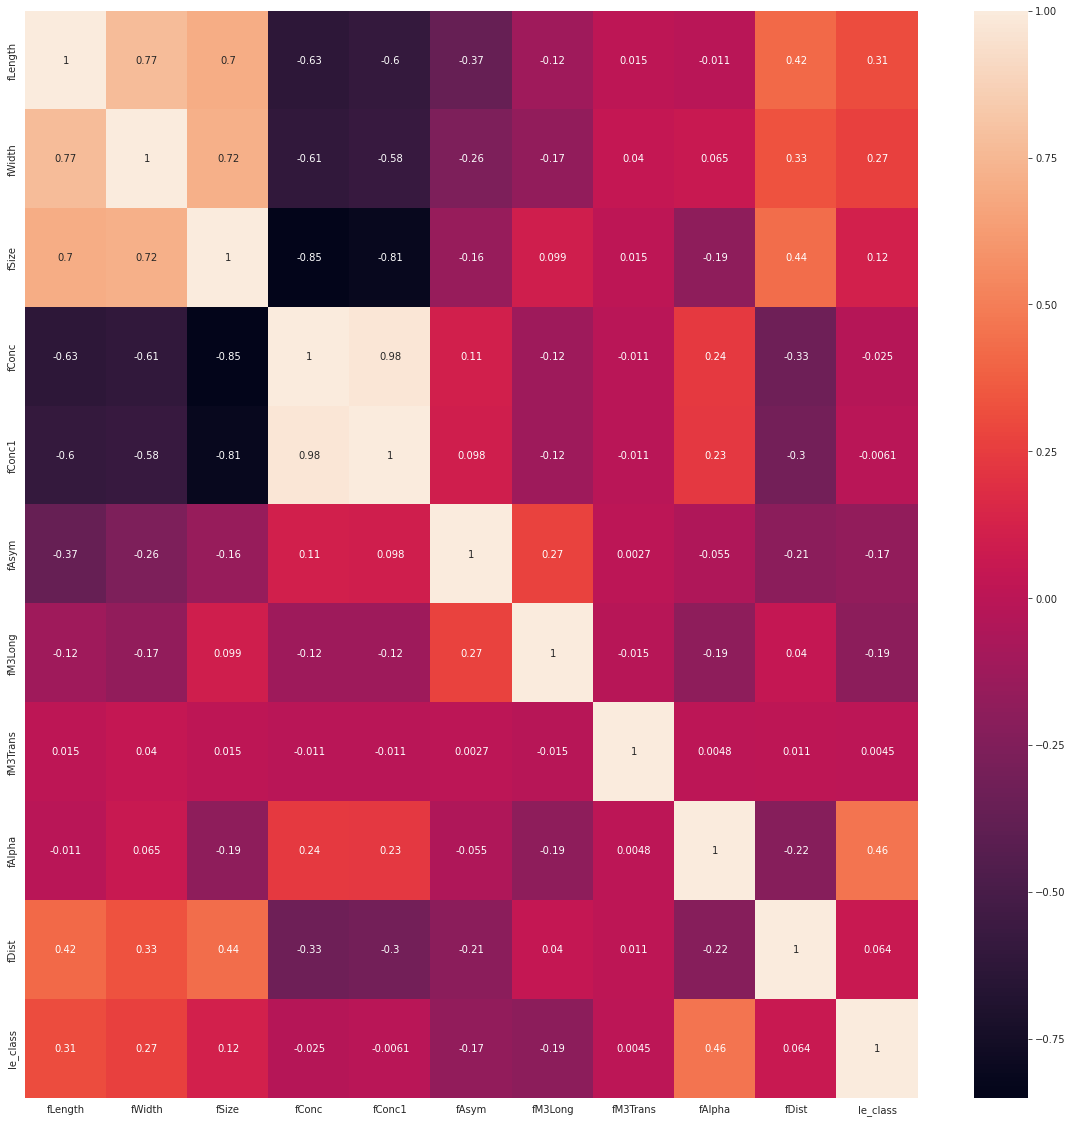

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot=True)

<Figure size 1440x1440 with 0 Axes>

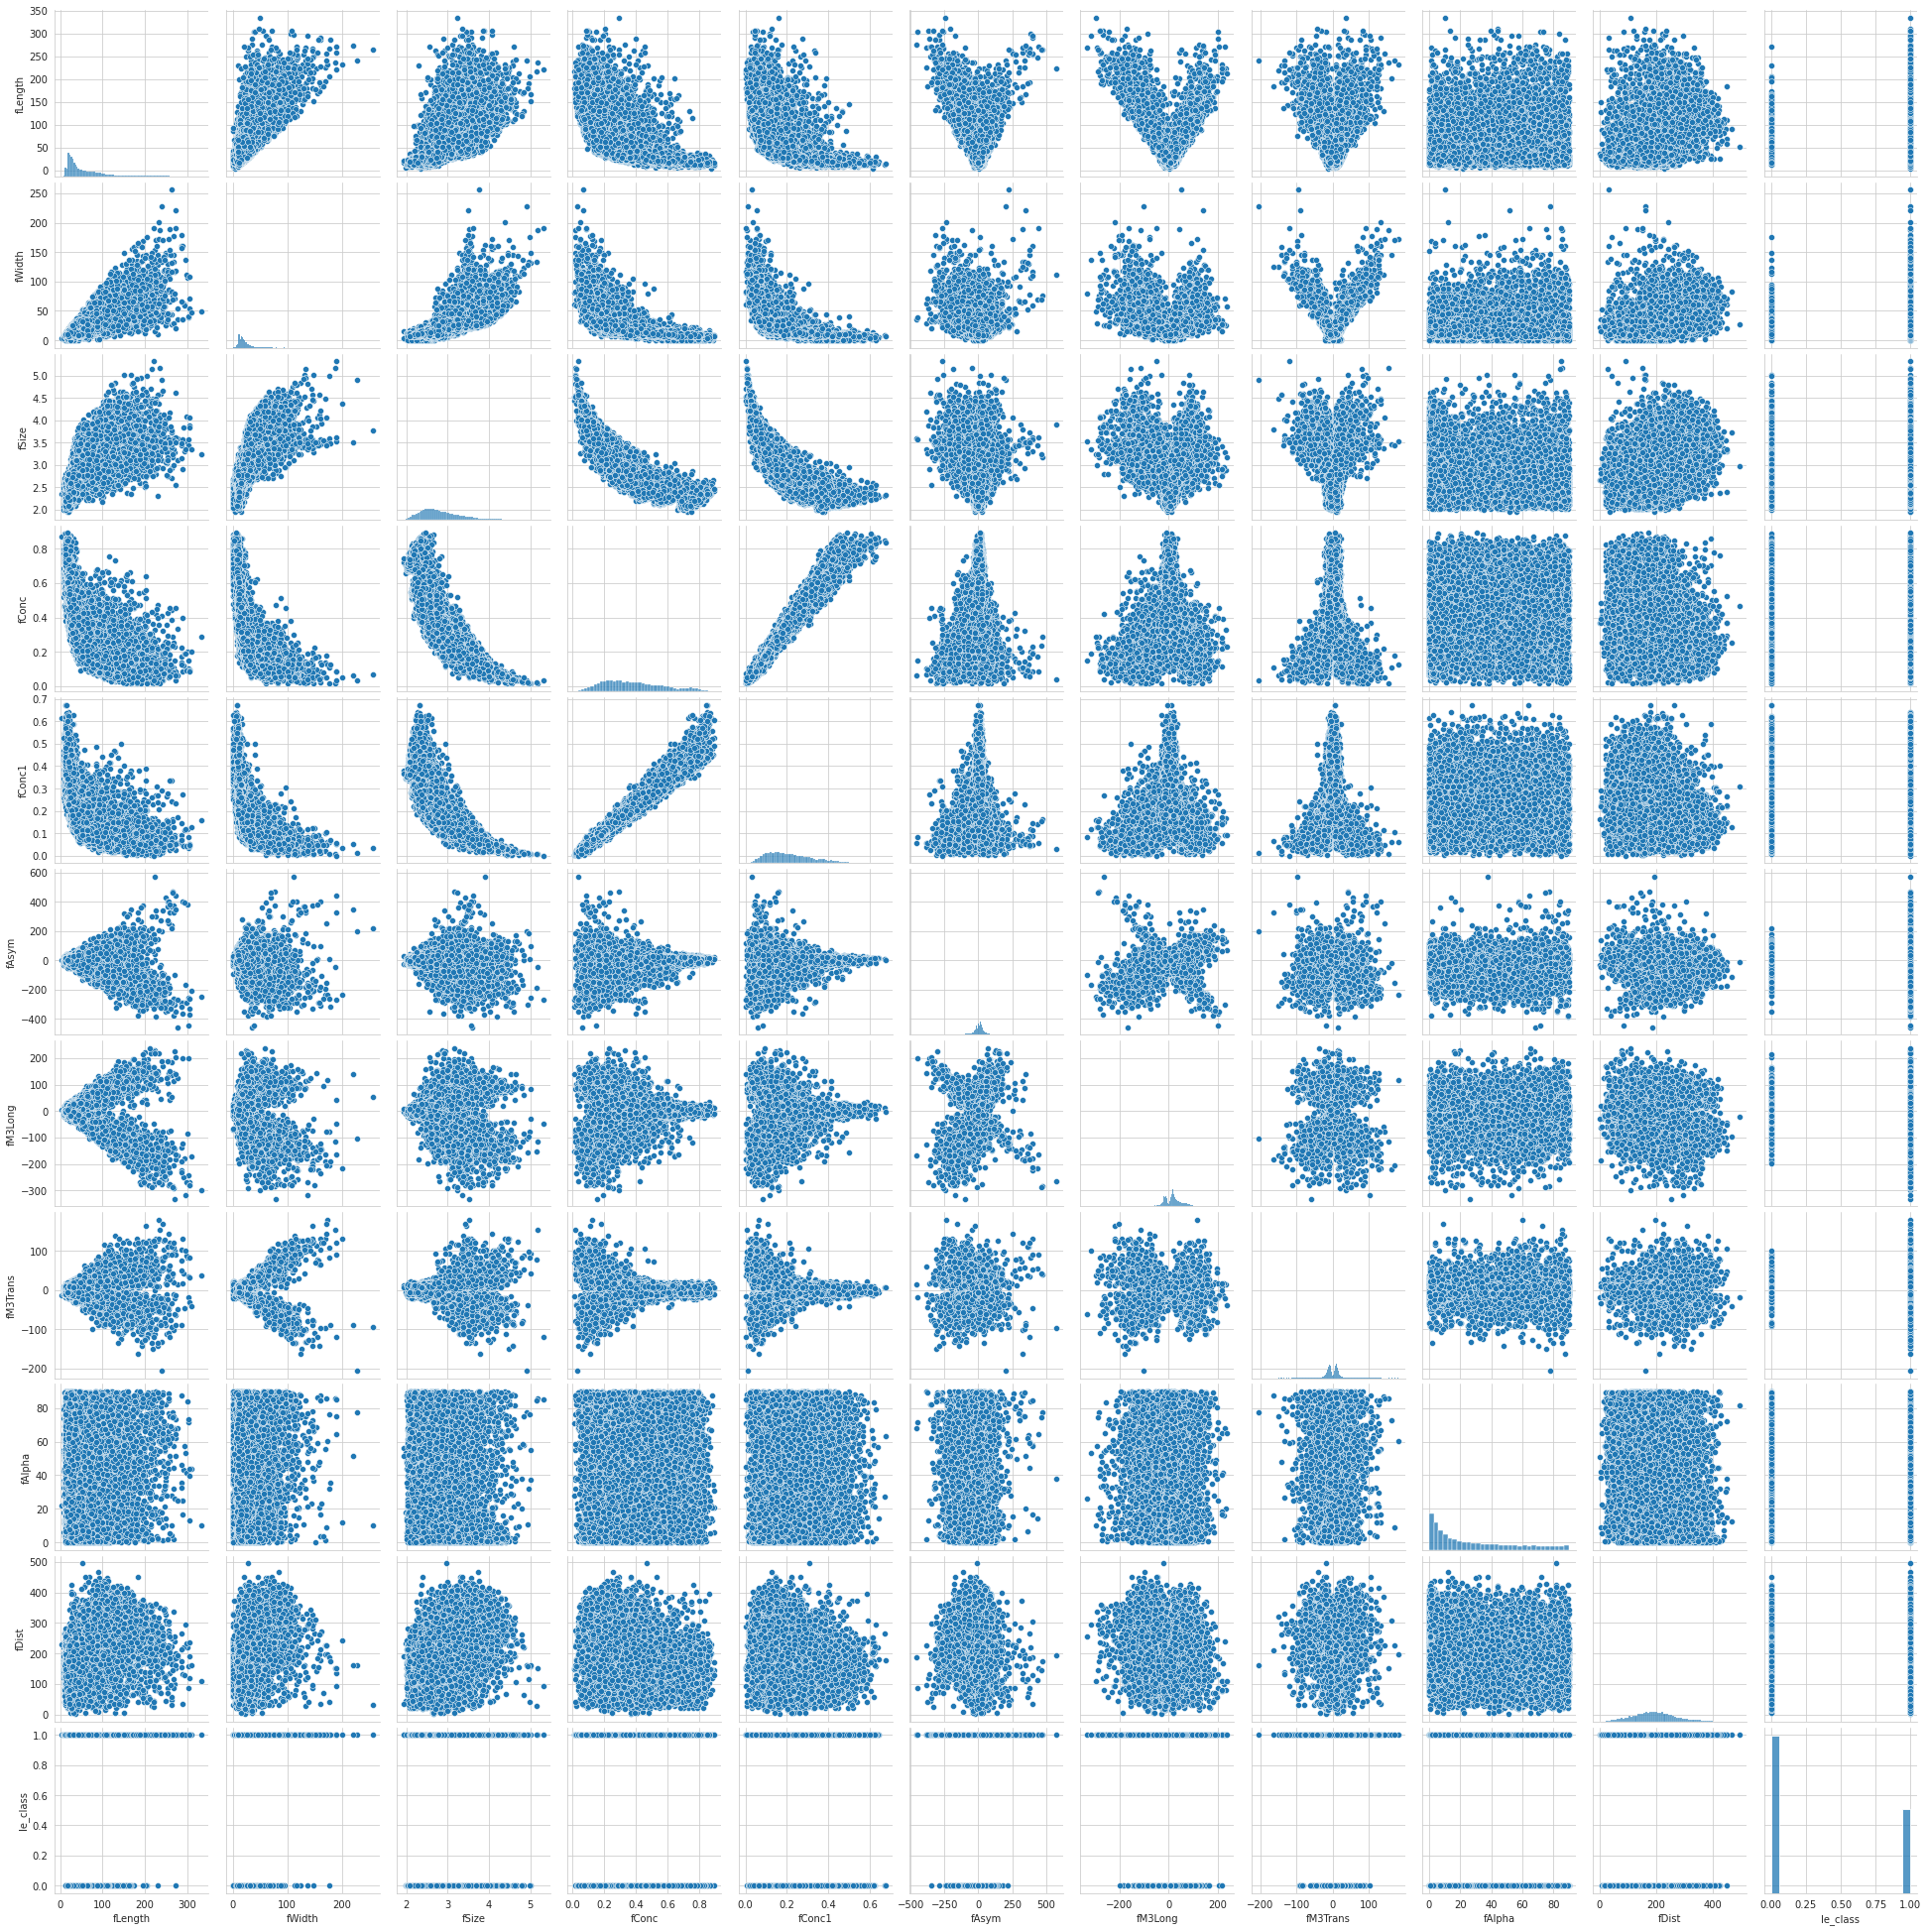

In [ ]:
plt.figure(figsize = (20, 20))
sns.pairplot(df)

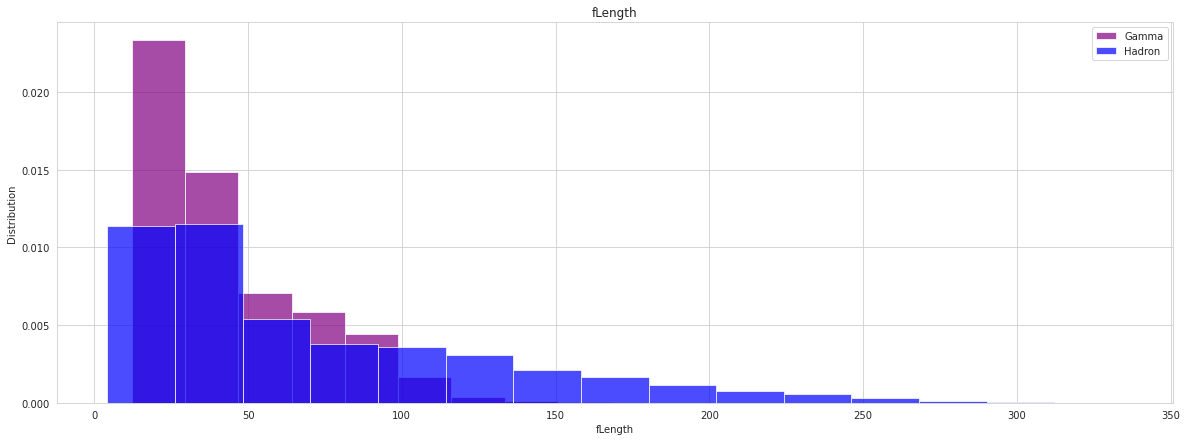

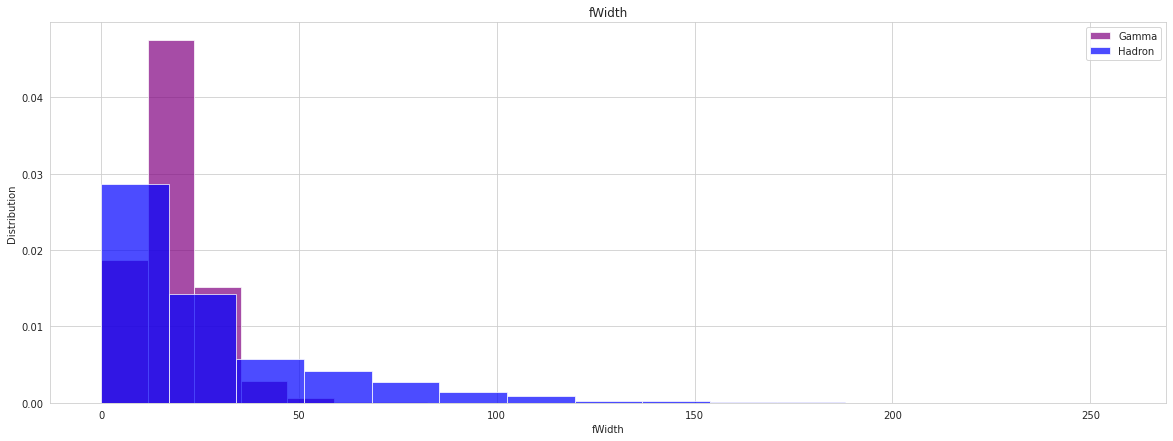

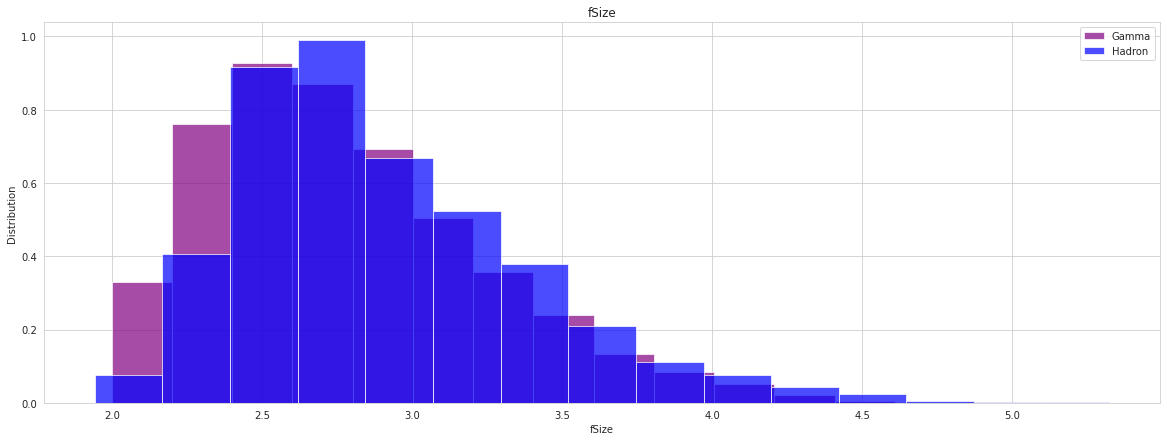

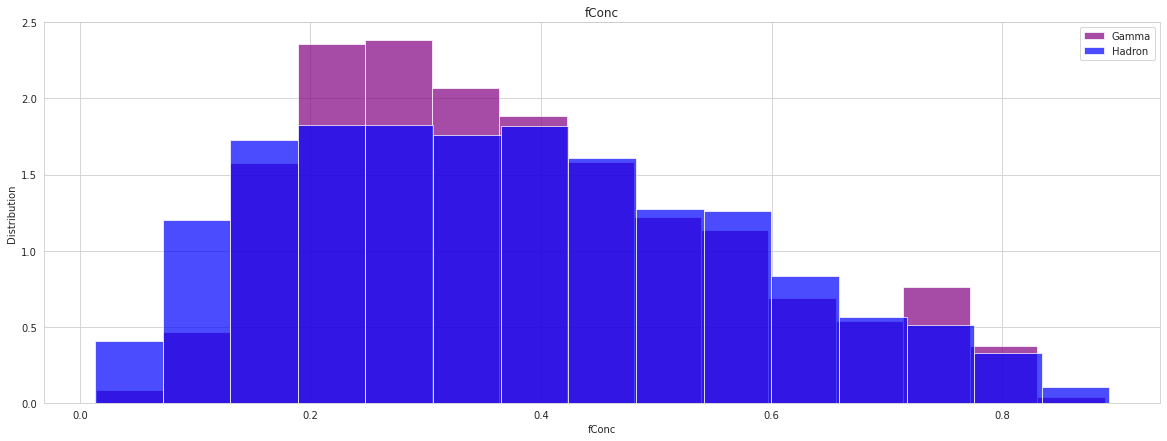

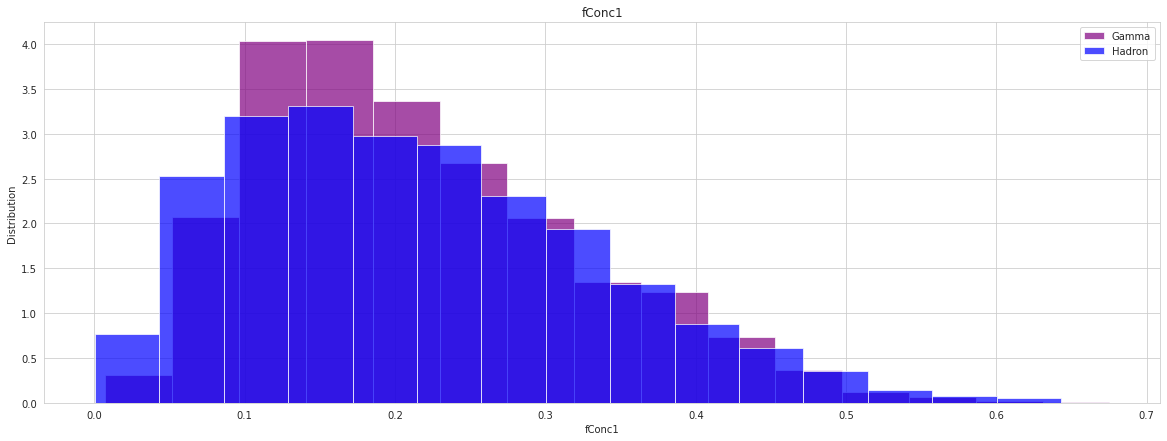

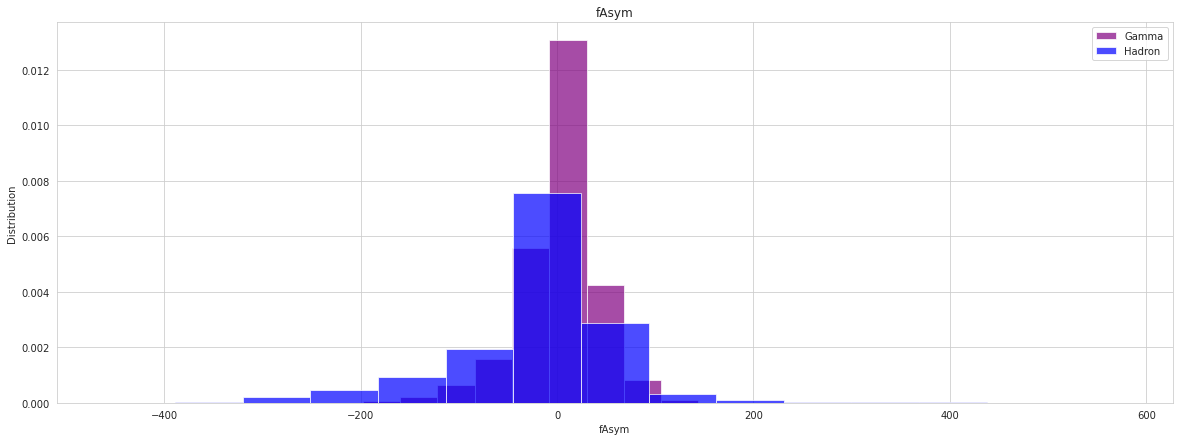

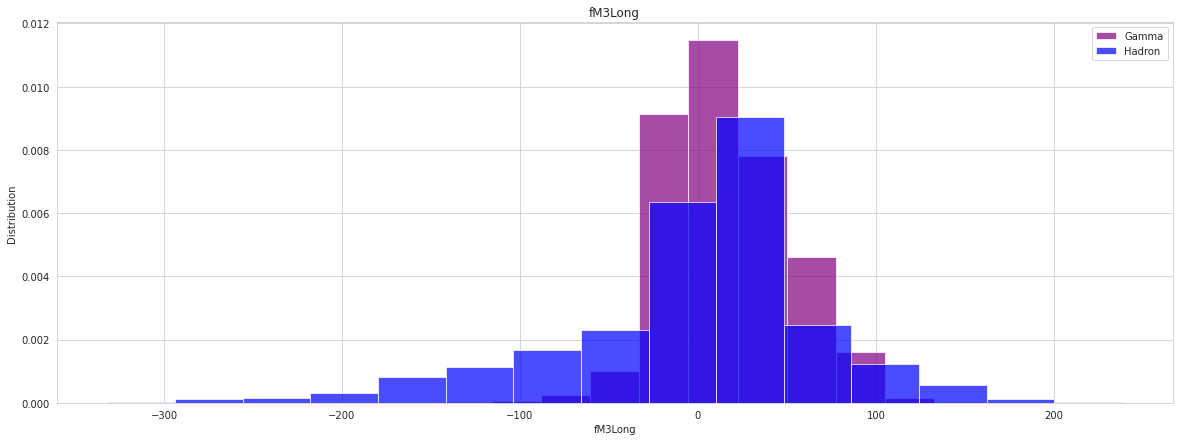

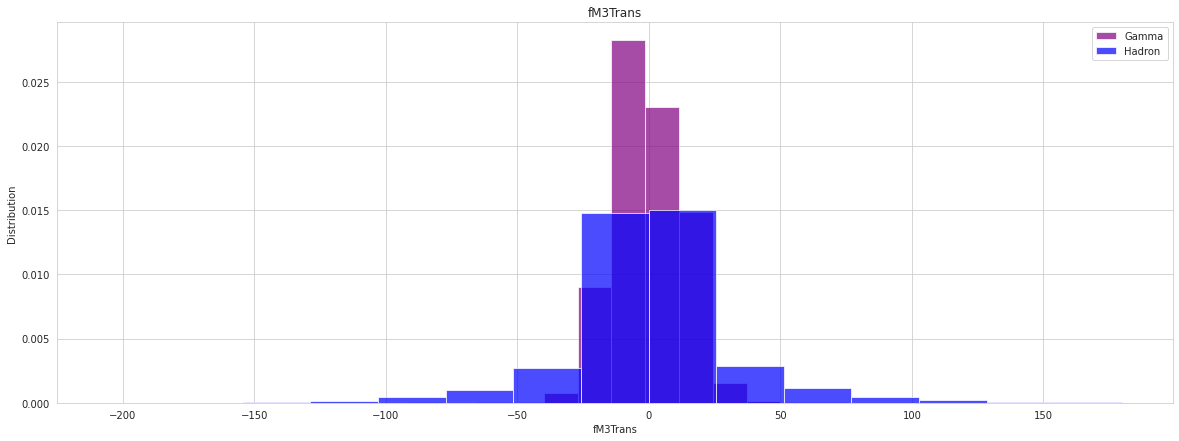

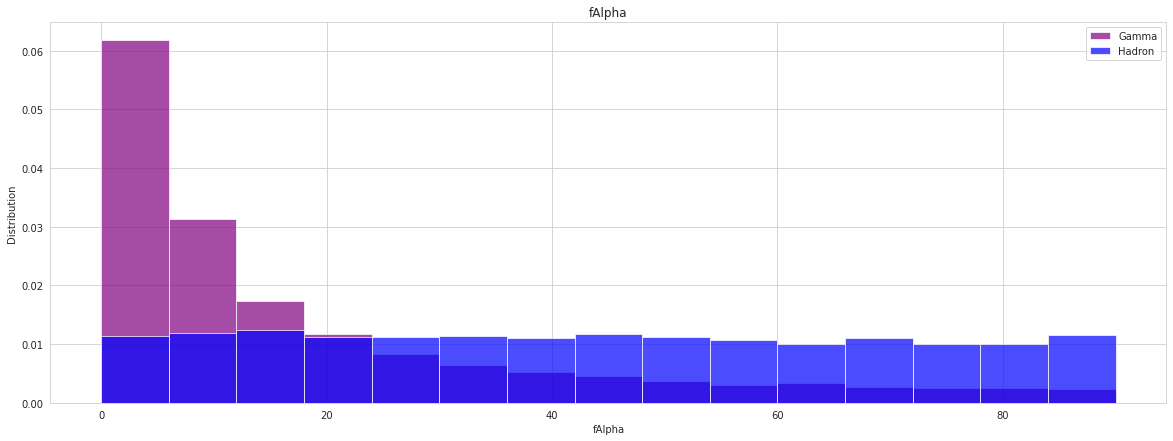

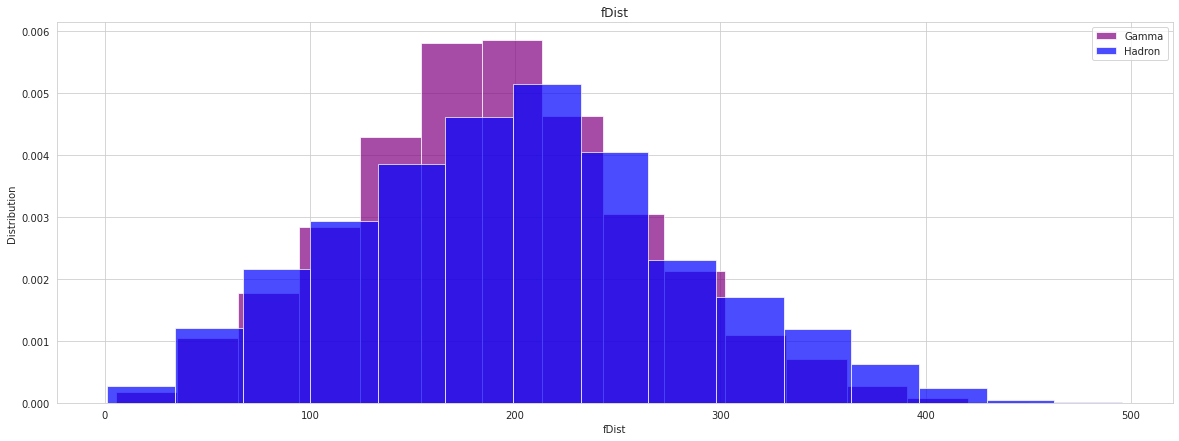

In [ ]:
for i in range(10):
  label = df.columns[i]
  plt.figure(figsize = (20, 7))
  plt.hist(df[df['le_class']==0][label], color='purple', label="Gamma", 
           alpha=0.7, density=True, bins=15) # Gamma
  plt.hist(df[df['le_class']==1][label], color='blue', label="Hadron", 
           alpha=0.7, density=True, bins=15) # Hadron
  plt.title(label)
  plt.ylabel("Distribution")
  plt.xlabel(label)
  plt.legend()
  plt.show()

<p>Split the data into train and test with 80 train / 20 test:</p>

In [ ]:
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

In [ ]:
train_stats.pop('le_class')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fLength,15123.0,52.905674,41.851244,4.2835,24.31225,36.9888,69.76830,334.1770
fWidth,15123.0,22.074668,18.172141,0.0000,11.86440,17.1103,24.66620,256.3820
fSize,15123.0,2.824652,0.472603,1.9413,2.47560,2.7400,3.10180,5.3233
fConc,15123.0,0.380714,0.182517,0.0133,0.23625,0.3548,0.50455,0.8930
fConc1,15123.0,0.214821,0.110158,0.0003,0.12910,0.1967,0.28610,0.6752
fAsym,15123.0,-3.869130,58.676581,-457.9161,-20.09520,4.0757,24.19350,575.2407
fM3Long,15123.0,10.918629,50.571194,-318.3002,-12.68935,15.3768,35.82535,227.8174
fM3Trans,15123.0,0.363875,20.724806,-164.1400,-10.77140,1.0305,11.00145,179.8510
fAlpha,15123.0,27.521954,26.103945,0.0000,5.47300,17.5239,45.77950,90.0000
fDist,15123.0,193.773505,74.923740,5.5449,142.26750,191.5559,241.06700,495.5610


In [ ]:
train_Y = format_output(train)
test_Y = format_output(test)

In [ ]:
len(train_Y)

15123

In [ ]:
len(test_Y)

3781

<h3>Test Train Split</h3>

<p>Creating train and test dataset Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing. Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing.</p>

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [ ]:
train_stats = train.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
fLength,12098.0,53.448485,42.640865,4.2835,24.360025,37.17880,70.293675,334.1770
fWidth,12098.0,22.367961,18.776384,0.0000,11.858025,17.26255,24.941125,256.3820
fSize,12098.0,2.826978,0.476703,1.9413,2.475700,2.74040,3.110600,5.3233
fConc,12098.0,0.379941,0.184173,0.0131,0.233600,0.35260,0.503300,0.8930
fConc1,12098.0,0.214441,0.111434,0.0003,0.127700,0.19540,0.285375,0.6752
fAsym,12098.0,-4.436511,59.641282,-457.9161,-20.876275,4.05110,24.295575,473.0654
fM3Long,12098.0,10.662809,51.208546,-331.7800,-12.440775,15.33220,35.938550,238.3210
fM3Trans,12098.0,0.351848,21.030764,-205.8947,-10.793475,1.14235,11.015900,179.8510
fAlpha,12098.0,27.479564,25.969845,0.0000,5.493500,17.47450,45.461175,90.0000
fDist,12098.0,194.229962,74.816356,1.2826,142.974175,192.36640,241.371850,466.4078


In [ ]:
train_stats = train.describe()
train_stats.pop('le_class')
train_stats = train_stats.transpose()

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fLength,12098.0,53.448485,42.640865,4.2835,24.360025,37.17880,70.293675,334.1770
fWidth,12098.0,22.367961,18.776384,0.0000,11.858025,17.26255,24.941125,256.3820
fSize,12098.0,2.826978,0.476703,1.9413,2.475700,2.74040,3.110600,5.3233
fConc,12098.0,0.379941,0.184173,0.0131,0.233600,0.35260,0.503300,0.8930
fConc1,12098.0,0.214441,0.111434,0.0003,0.127700,0.19540,0.285375,0.6752
fAsym,12098.0,-4.436511,59.641282,-457.9161,-20.876275,4.05110,24.295575,473.0654
fM3Long,12098.0,10.662809,51.208546,-331.7800,-12.440775,15.33220,35.938550,238.3210
fM3Trans,12098.0,0.351848,21.030764,-205.8947,-10.793475,1.14235,11.015900,179.8510
fAlpha,12098.0,27.479564,25.969845,0.0000,5.493500,17.47450,45.461175,90.0000
fDist,12098.0,194.229962,74.816356,1.2826,142.974175,192.36640,241.371850,466.4078


<p>Now, we need to seperate our data as dependent and independent variables. <code>le_class</code>column is our independent variable. Except <code>le_class</code> columns are dependent variables.</p>


In [ ]:
# Function taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def format_output(data):
    target = data.pop('le_class')
    target = np.array(target)
    return target

<p>Now, we can pop independent variables from <code>test</code>, <code>train</code> and <code>val</code> dataset.

In [ ]:
train_Y = format_output(train)

val_Y = format_output(val)

test_Y = format_output(test)

<p>For an instance, let's take a look at <code>train</code> dataframe:</p>

In [ ]:
train.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
15812,191.0650,36.0059,3.1867,0.1542,0.0895,186.4820,156.1550,24.1833,30.2540,64.8841
1993,48.0175,32.6580,3.4379,0.1791,0.1122,6.1968,37.0195,23.5773,8.7025,127.1720
16249,41.6924,14.7497,3.0702,0.3008,0.2007,-53.2757,-20.8044,-8.7822,59.5712,177.3062
4741,23.6595,16.5110,2.6425,0.3759,0.2062,-10.9314,-12.0225,5.2125,24.2550,217.0920
12643,27.8319,9.9979,2.5198,0.5480,0.3400,33.0252,25.6028,8.7252,33.7903,205.8957


<p>Now, we need to normalize the our dataset with the following formula.</p>

$$x_{norm} = \frac{x - \mu}{\sigma}$$

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
norm_train_X = norm(train)
norm_val_X = norm(val) 
norm_test_X = norm(test)

<p>Like we did before, let's take a look at our <code>train</code> data again.

In [ ]:
norm_train_X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
15812,3.227339,0.726335,0.754604,-1.225700,-1.121208,3.201113,2.841170,1.133171,0.106833,-1.728845
1993,-0.127366,0.548031,1.281558,-1.090501,-0.917500,0.178288,0.514693,1.104356,-0.723033,-0.896301
16249,-0.275700,-0.405736,0.510217,-0.429708,-0.123308,-0.818882,-0.614491,-0.434318,1.235727,-0.226204
4741,-0.698602,-0.311932,-0.386988,-0.021939,-0.073951,-0.108899,-0.442999,0.231121,-0.124166,0.305575
12643,-0.600752,-0.658810,-0.644381,0.912511,1.126760,0.628117,0.291748,0.398148,0.243002,0.155925


<br>
<h2 align=center id="build_fit_model">Build and Fit the Model</h2>

In [ ]:
LR = 0.0001 #@param {type:"number"}
EPOCHS = 60 #@param {type:"number"}
INDEPENDENT_VARIABLES = len(train.columns)

<p>You can use the weights builded by myself. For that, please uncomment the following code line:</p>

In [ ]:
#model = keras.models.load_model('/content/best_model.h5')

In [ ]:
def create_model(input_len):
  input_layer = Input(shape=(INDEPENDENT_VARIABLES, ))

  x = Dense(units='128', activation='relu', name='first_dense')(input_layer)
  x = Dropout(0.1, name="first_dropout")(x)
  x = Dense(units='128', activation='relu', name='second_dense')(x)
  x = Dropout(0.1, name="second_dropout")(x)
  x = Dense(units='64', activation='relu', name='third_dense')(x)
  x = Dropout(0.1, name="third_dropout")(x)
  x = Dense(units='32', activation='sigmoid', name='fourth_dense')(x)

  class_output = Dense(units='1', name='class_output')(x)

  model = Model(inputs=input_layer, outputs=class_output)

  print(model.summary())
  return model

In [ ]:
model = create_model(train.columns)
model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 first_dense (Dense)         (None, 128)               1408      
                                                                 
 first_dropout (Dropout)     (None, 128)               0         
                                                                 
 second_dense (Dense)        (None, 128)               16512     
                                                                 
 second_dropout (Dropout)    (None, 128)               0         
                                                                 
 third_dense (Dense)         (None, 64)                8256      
                                                                 
 third_dropout (Dropout)     (None, 64)                0     

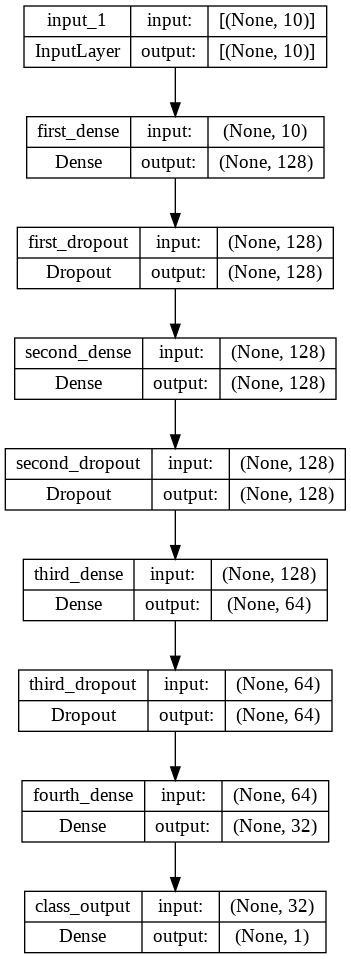

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
def base_model(inputs):
    
  x = Dense(units='128', activation='relu', name='base_dense_1')(inputs)
  x = Dropout(0.1, name="base_dropout_1")(x)
  x = Dense(units='128', activation='relu', name='base_dense_2')(x)
  x = Dropout(0.1, name="base_dropout_2")(x)
  x = Dense(units='64', activation='relu', name='base_dense_3')(x)
  x = Dropout(0.1, name="base_dropout_3")(x)
  x = Dense(units='32', activation='sigmoid', name='base_dense_4')(x)
  
  return x

def final_model(inputs):
    
  x = base_model(inputs)

  class_type = Dense(units='1', activation='sigmoid', name='class_type')(x)
  model = Model(inputs=inputs, outputs=class_type)

  print(model.summary())
  return model

In [ ]:
inputs = tf.keras.layers.Input(shape=(INDEPENDENT_VARIABLES,))
rms = tf.keras.optimizers.RMSprop(lr=LR)
model = final_model(inputs)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 base_dense_1 (Dense)        (None, 128)               1408      
                                                                 
 base_dropout_1 (Dropout)    (None, 128)               0         
                                                                 
 base_dense_2 (Dense)        (None, 128)               16512     
                                                                 
 base_dropout_2 (Dropout)    (None, 128)               0         
                                                                 
 base_dense_3 (Dense)        (None, 64)                8256      
                                                                 
 base_dropout_3 (Dropout)    (None, 64)                0   

In [ ]:
model.compile(optimizer=rms, 
            loss = {'class_type' : 'binary_crossentropy'},
            metrics = {'class_type' : 'accuracy'}
            )

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs = EPOCHS, validation_data=(norm_val_X, val_Y), 
                    callbacks=[callbacks_list])

Epoch 1/60
351/379 [==========================>...] - ETA: 0s - loss: 0.7199 - accuracy: 0.5458
Epoch 1: val_accuracy improved from -inf to 0.78545, saving model to best_model.h5
379/379 [==============================] - 2s 3ms/step - loss: 0.7053 - accuracy: 0.5631 - val_loss: 0.5038 - val_accuracy: 0.7855
Epoch 2/60
376/379 [============================>.] - ETA: 0s - loss: 0.4426 - accuracy: 0.8098
Epoch 2: val_accuracy improved from 0.78545 to 0.82083, saving model to best_model.h5
379/379 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.8098 - val_loss: 0.4110 - val_accuracy: 0.8208
Epoch 3/60
366/379 [===========================>..] - ETA: 0s - loss: 0.4001 - accuracy: 0.8244
Epoch 3: val_accuracy improved from 0.82083 to 0.83405, saving model to best_model.h5
379/379 [==============================] - 1s 2ms/step - loss: 0.4018 - accuracy: 0.8234 - val_loss: 0.3910 - val_accuracy: 0.8340
Epoch 4/60
367/379 [============================>.] - ETA: 0s - 

<br>
<h2 align=center id="analize_model">Analize the Model</h2>

In [ ]:
def plot_metrics(metric_name, title, ylim=5):
  plt.figure(figsize = (20, 10))
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='purple',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='blue',label='val_' + metric_name)
  plt.legend(['train', 'validation'])
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

In [ ]:
# Function taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0, 1]):
  cm = confusion_matrix(y_true, y_pred)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion Matrix of the Classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="black" if cm[i, j] > thresh else "white")
  plt.show()

In [ ]:
predictions = model.predict(norm_test_X)

119/119 [==============================] - 0s 943us/step


In [ ]:
np.round(predictions)

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
test_Y

array([1, 0, 1, ..., 0, 0, 0])

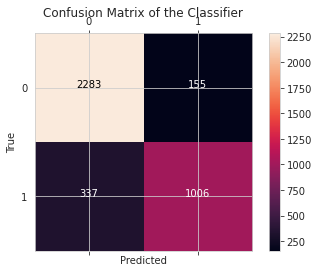

In [ ]:
plot_confusion_matrix(test_Y, np.round(predictions), title='Class Type', labels = [0, 1])

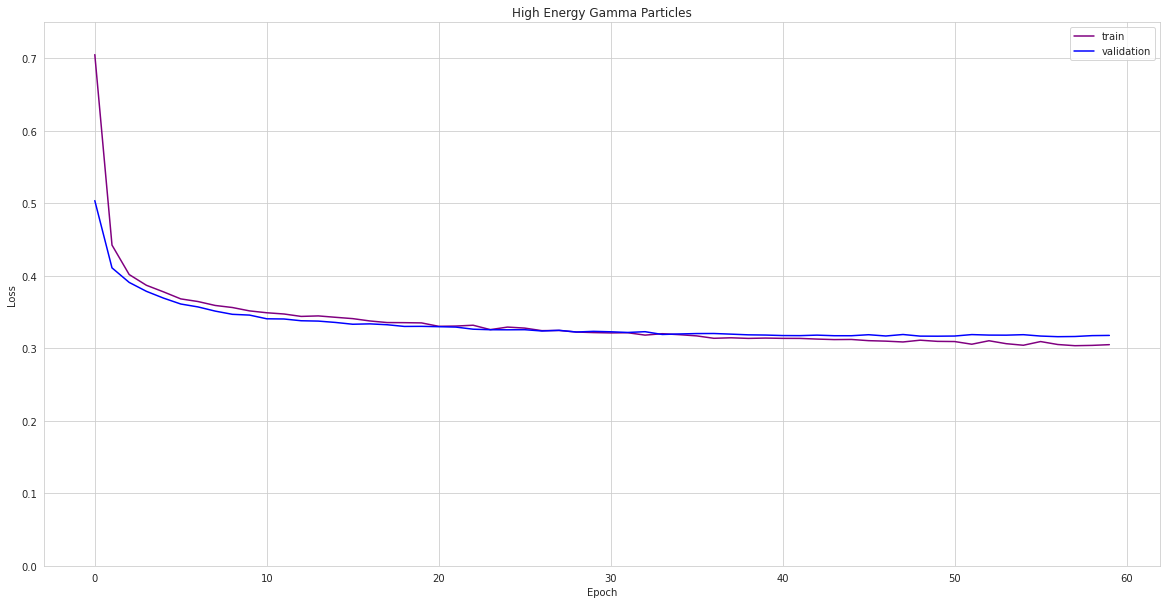

In [ ]:
plot_metrics('loss', 'High Energy Gamma Particles', ylim=0.75)

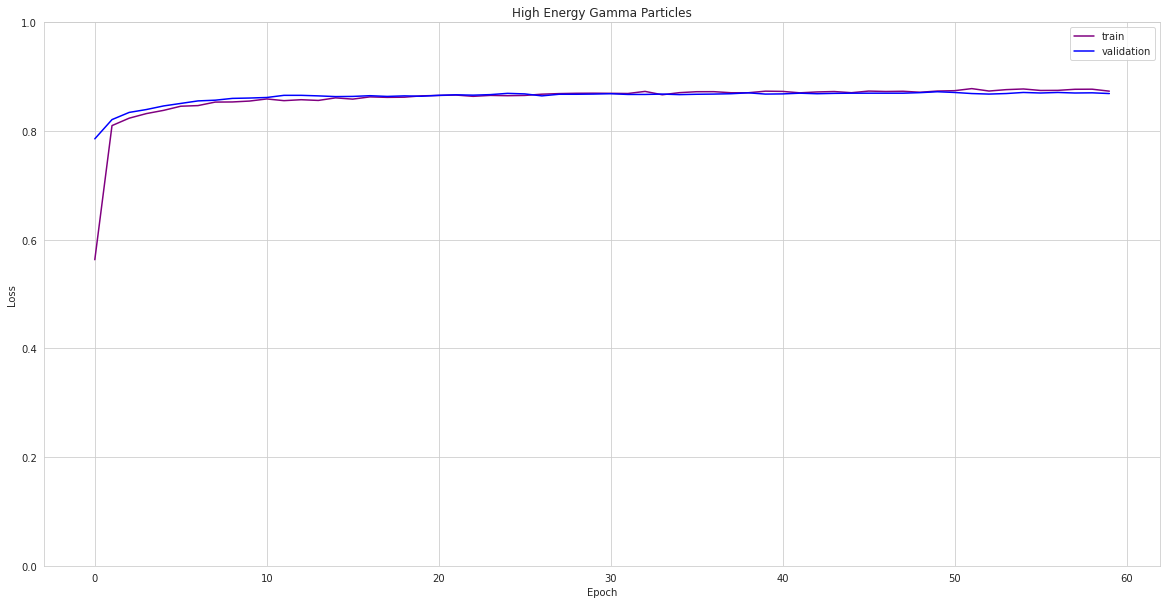

In [ ]:
plot_metrics('accuracy', 'High Energy Gamma Particles', ylim=1)

<p>Now, we can build our ROC curve for our <code>best_model</code>.</p>

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_Y, np.round(predictions))
fpr, tpr, thresholds = roc_curve(test_Y, np.round(predictions))

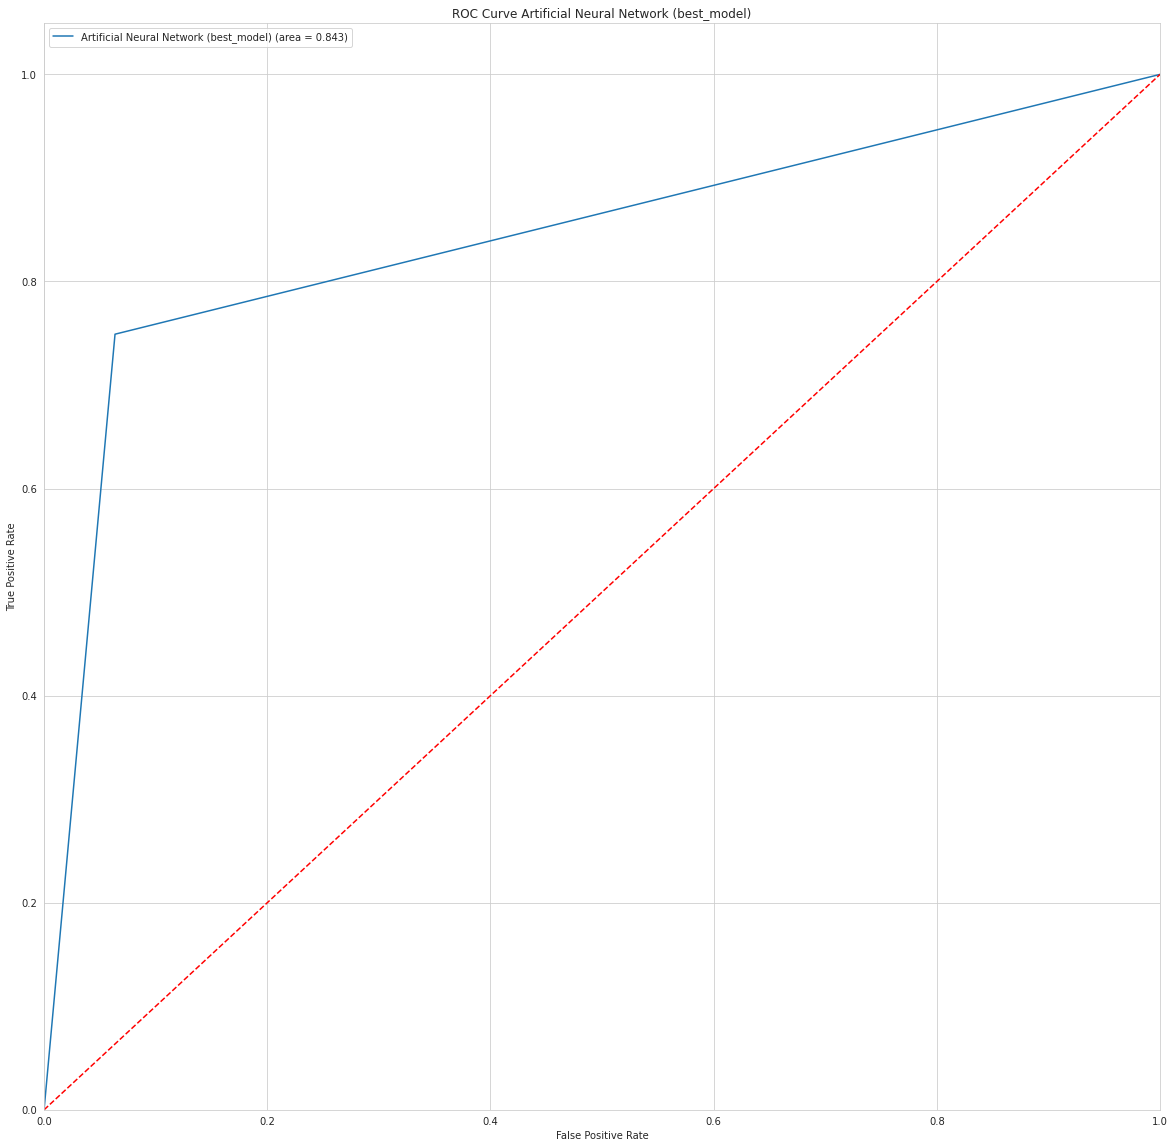

In [ ]:
plt.figure(figsize=(20, 20))
plt.plot(fpr, tpr, label='Artificial Neural Network (best_model) (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Artificial Neural Network (best_model)')
plt.legend(loc='upper left')
#plt.savefig('Log_ROC_curve')
plt.show()

<br>
<h2 align=center id="revelant_papers">Relevant Papers</h2>

<ul>
  <li><b>Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T., Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S., Vaicilius, A., Wittek W. (2004).</b> <i>Methods for multidimensional event classification: a case study using images from a Cherenkov gamma-ray telescope. Nucl.Instr.Meth. A, 516, pp. 511-528.</i></li>
  <br>
  <li><b>P. Savicky, E. Kotrc. Experimental Study of Leaf Confidences for Random Forest.</b> <i>Proceedings of COMPSTAT 2004, In: Computational Statistics. (Ed.: Antoch J.) - Heidelberg, Physica Verlag 2004, pp. 1767-1774.</i></li>
  <br>
  <li><b>J. Dvorak, P. Savicky. Softening Splits in Decision Trees Using Simulated Annealing.</b> <i>Proceedings of ICANNGA 2007, Warsaw, (Ed.: Beliczynski et. al), Part I, LNCS 4431, pp. 721-729. </i></li>
<ul>

<br>

<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [73]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-01-05 21:22:07
